In [1]:
# https://udemy.com/recommender-systems
# https://deeplearningcourses.com/recommender-systems
from __future__ import print_function, division
from builtins import range, input


import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

# load in the data
df = pd.read_csv('large_files/movielens-20m-dataset/edited_rating.csv')

N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies

# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
# reg = 0.0001 # regularization penalty
#nota: os warnings exibidos abaixo são provenientes do uso do tensorflow com a gpu e versoes do numpy suportadas

Using TensorFlow backend.
C:\Users\Gustavo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gustavo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gustavo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gustavo\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)


In [3]:
# the neural network

# hyperparametros das camadas da NN - testanto algumas variações nos notebooks "MF com Keras e DeepNN X"
x = Dense(400)(x) #densidade de neunorion da camada implicita
# x = BatchNormalization()(x) #normalizacao de batch nessa camada
x = Activation('relu')(x)# funcao de ativacao dessa camada
# x = Dropout(0.5)(x)# setar dropout de neuronios da camada 
# x = Dense(100)(x)#outra camada implicita
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
x = Dense(1)(x)# camada de saida

In [4]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)



Train on 16000210 samples, validate on 4000053 samples
Epoch 1/15
16000210/16000210 [==============================] - 535s 33us/step - loss: 0.7479 - mse: 0.7478 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 2/15
16000210/16000210 [==============================] - 551s 34us/step - loss: 0.6889 - mse: 0.6889 - val_loss: 0.6803 - val_mse: 0.6803
Epoch 3/15
16000210/16000210 [==============================] - 531s 33us/step - loss: 0.6615 - mse: 0.6615 - val_loss: 0.6744 - val_mse: 0.6744
Epoch 4/15
16000210/16000210 [==============================] - 534s 33us/step - loss: 0.6401 - mse: 0.6401 - val_loss: 0.6718 - val_mse: 0.6718
Epoch 5/15
16000210/16000210 [==============================] - 528s 33us/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 6/15
16000210/16000210 [==============================] - 528s 33us/step - loss: 0.6126 - mse: 0.6126 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 7/15
16000210/16000210 [==============================] - 530s 33us/

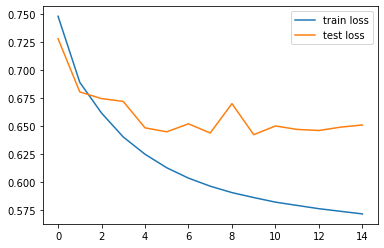

In [5]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

In [6]:
#Plotamos o erro quadratico medio caso utilizemos regularizacao
# plot mse
#plt.plot(r.history['mse'], label="train mse")
#plt.plot(r.history['val_mse'], label="test mse")
#plt.legend()
#plt.show()